In [6]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots

In [7]:
# reading data from csv file
df = pd.read_csv('creditcard.csv')

In [5]:
df = df[df.Amount < 10000]

In [8]:
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]
df.to_csv("scaled_data.csv")
print('Scaled Data\n')
df.head(10)

Scaled Data



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.994960,-0.256131,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.994937,-0.237686,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.994901,0.262698,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.994901,0.994900,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.994878,-0.255991,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


X = df.drop('Class', axis=1)
y = df['Class']

X.to_csv("X.csv")
y.to_csv("y.csv")

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
original_Xtrain.to_csv("X_train.csv")
original_ytrain.to_csv("y_train.csv")
original_Xtest.to_csv("X_test.csv")
original_ytest.to_csv("y_test.csv")

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [24]:
fraud = df[df.Class == 1]
fraud.to_csv("Fraudulant_Transactions.csv")
nonfraud = df[df.Class == 0]
nonfraud.to_csv("Non-Fraudulant_Transactions.csv")


In [22]:
X_fraud = fraud.drop('Class', axis=1)
X_fraud.to_csv("X_fraud.csv")

In [121]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:250: UserWarning: max_samples (284807) is greater than the total number of samples (1492). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[198269  86046]
 [    57    435]]
0.6976794811925269
              precision    recall  f1-score   support

           0       1.00      0.70      0.82    284315
           1       0.01      0.88      0.01       492

   micro avg       0.70      0.70      0.70    284807
   macro avg       0.50      0.79      0.42    284807
weighted avg       1.00      0.70      0.82    284807

Total number of Transactions classified as Fraudulent:  86481
Number of Fraudulent Transactions classified as Non-fraudulent:  57 out of 492


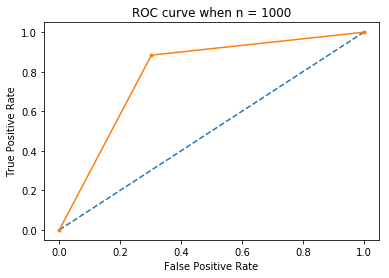

In [156]:
nonfraud_sample = nonfraud.sample(n=1000)
df_outlier=pd.concat([fraud,nonfraud_sample])
df_outlier.to_csv("df_sample.csv")
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

X_train.to_csv("X_outlier.csv")
y_train.to_csv("y_outlier.csv")

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y,y_pred)
print(mat)
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 492")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:250: UserWarning: max_samples (284807) is greater than the total number of samples (45492). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[282609   1706]
 [   266    226]]
0.9930760128788969
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.12      0.46      0.19       492

   micro avg       0.99      0.99      0.99    284807
   macro avg       0.56      0.73      0.59    284807
weighted avg       1.00      0.99      1.00    284807

Total number of Transactions classified as Fraudulent:  1932
Number of Fraudulent Transactions classified as Non-fraudulent:  266 out of 492


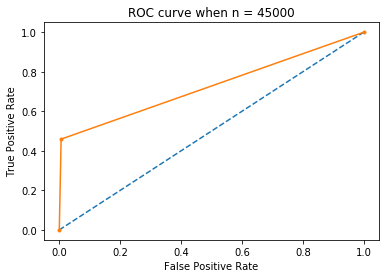

In [155]:
nonfraud_sample = nonfraud.sample(n=45000)
df_outlier=pd.concat([fraud,nonfraud_sample])
df_outlier.to_csv("df_sample.csv")
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

X_train.to_csv("X_outlier.csv")
y_train.to_csv("y_outlier.csv")

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y,y_pred)
print(mat)
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 492")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 45000')
# show the plot
pyplot.show()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:250: UserWarning: max_samples (284807) is greater than the total number of samples (5492). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[273105  11210]
 [   129    363]]
0.9601870740536574
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.03      0.74      0.06       492

   micro avg       0.96      0.96      0.96    284807
   macro avg       0.52      0.85      0.52    284807
weighted avg       1.00      0.96      0.98    284807

Total number of Transactions classified as Fraudulent:  11573
Number of Fraudulent Transactions classified as Non-fraudulent:  129 out of 492


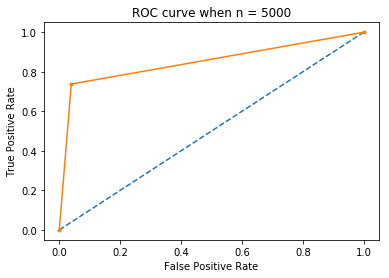

AttributeError: 'AxesSubplot' object has no attribute 'show'

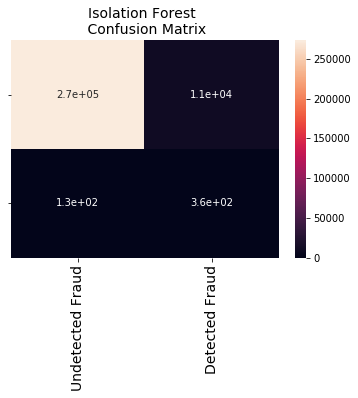

In [176]:
nonfraud_sample = nonfraud.sample(n=5000)
df_outlier=pd.concat([fraud,nonfraud_sample])
df_outlier.to_csv("df_sample.csv")
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

X_train.to_csv("X_outlier.csv")
y_train.to_csv("y_outlier.csv")

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y,y_pred)
print(mat)
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 492")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 5000')
# show the plot
pyplot.show()



[Text(0, 0.5, ''), Text(0, 1.5, '')]

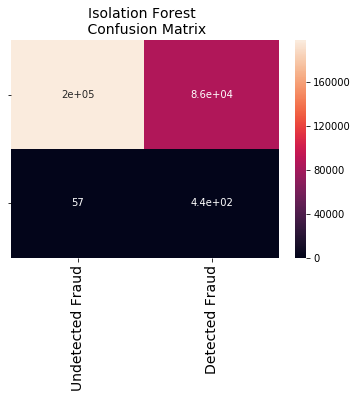